# Library

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau,LearningRateScheduler

In [2]:
df = pd.read_csv(f'E:/gitlab/machine-learning/dataset/bbc-text.csv', 
                 sep=',',header=0)

In [3]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [4]:
categories = pd.get_dummies(df.category)
df_baru = pd.concat([df, categories], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


# split data

In [5]:
kalimat = df_baru['text'].values
y = df_baru[["business","entertainment","politics","sport","tech"]].values
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, y, test_size=0.2)

In [6]:
print(len(kalimat))
print(len(y))
print(len(kalimat_latih))
print(len(label_latih))
print(len(kalimat_test))
print(len(label_test))

2225
2225
1780
1780
445
445


# Params

In [7]:
vocab_size = 5000
oov_tok = 'x'
num_epochs = 36

In [8]:
res = df['text'].str.split().str.len().max()
print("The maximum length in words are : " +  str(res)) 

The maximum length in words are : 4492


# Tokenizer

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)

# Get metadata

In [ ]:
word2index = tokenizer.word_index

In [ ]:
with open('word2index.json', 'w') as fp:
    json.dump(word2index, fp)

# sequence

In [10]:
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

# pad sequences

In [11]:
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

# Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 355,269
Trainable params: 355,269
Non-trainable params: 0
_________________________________________________________________


# Callback

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.91):
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True
callbacks = myCallback()

# fitting

In [14]:
history = model.fit(
            padded_latih, label_latih,
            epochs=num_epochs,
            validation_data=(padded_test, label_test),
            callbacks=[callbacks],verbose=1)

Train on 1780 samples, validate on 445 samples
Epoch 1/36
1780/1780 [==============================] - 19s 11ms/sample - loss: 1.5924 - accuracy: 0.2534 - val_loss: 1.4969 - val_accuracy: 0.3685
Epoch 2/36
1780/1780 [==============================] - 15s 9ms/sample - loss: 1.2583 - accuracy: 0.5522 - val_loss: 1.8099 - val_accuracy: 0.4337
Epoch 3/36
1780/1780 [==============================] - 17s 10ms/sample - loss: 0.6856 - accuracy: 0.7590 - val_loss: 0.5198 - val_accuracy: 0.8337
Epoch 4/36
1780/1780 [==============================] - 17s 10ms/sample - loss: 0.3043 - accuracy: 0.9281 - val_loss: 0.4668 - val_accuracy: 0.8584
Epoch 5/36
1780/1780 [==============================] - 16s 9ms/sample - loss: 0.1489 - accuracy: 0.9601 - val_loss: 0.4766 - val_accuracy: 0.8382
Epoch 6/36
1780/1780 [==============================] - 16s 9ms/sample - loss: 0.0723 - accuracy: 0.9848 - val_loss: 0.3692 - val_accuracy: 0.8854
Epoch 7/36
1780/1780 [==============================] - 17s 9ms/samp

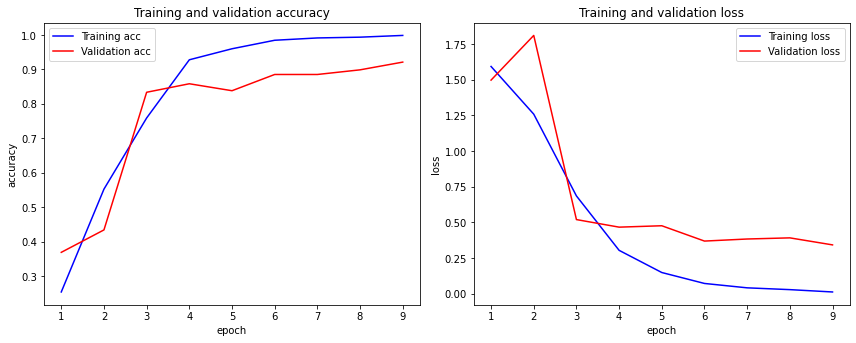

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(x, acc, 'b', label='Training acc')
ax[0].plot(x, val_acc, 'r', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend()

ax[1].plot(x, loss, 'b', label='Training loss')
ax[1].plot(x, val_loss, 'r', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend()
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()